# **`Data Analysis`**
# Background data

Data meanings:

- `VendorID`:   A code indicating the LPEP provider that provided
                the record.
                1 = Creative Mobile Technologies, LLC.
                2 = VeriFone Inc.
- `lpep_pickup_datetime`: The date and time when the meter was engaged.
- `lpep_dropoff_datetime`: The date and time when the meter was disengaged.
- `Passenger_count`:    The number of passengers in the vehicle.
                        This is a driver-entered value.
- `Trip_distance`: The elapsed trip distance in miles was reported by the taximeter.
- `PULocationID`: TLC Taxi Zone in which the taximeter was engaged.
- `DOLocationID`: TLC Taxi Zone in which the taximeter was disengaged.
- `RateCodeID`: The final rate code is in effect at the end of the trip.
                1 = Standard rate
                2 =JFK
                3 =Newark
                4 =Nassau or Westchester
                5 =Negotiated fare
                6 =Group ride
- `Store_and_fwd_flag`: This flag indicates whether the trip record was held
                        in the vehicle memory before sending to the vendor,
                        aka “store and forward,” because the vehicle did
                        not have a connection to the server.
                        Y = store and forward trip
                        N = not a store and forward trip
- `Payment_type`:   A numeric code signifying how the passenger paid for the trip.
                    1 = Credit card
                    2 = Cash
                    3 = No charge
                    4 = Dispute
                    5 = Unknown
                    6 = Voided trip
- `Fare_amount`:The time-and-distance fare is calculated by the meter. 
                Extra Miscellaneous extras and surcharges.
                Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
- `MTA_tax`:$0.50 MTA tax that is automatically triggered based on the metered rate in use.
- `Improvement_surcharge`:  $0.30 improvement surcharge assessed on hailed trips at the flag drop. 
                            The improvement surcharge began being levied in 2015.
- `Tip_amount`:This field is automatically populated for credit card tips. Cash tips are not included.
- `Tolls_amount`:The total amount of all tolls paid in the trip.
- `Total_amount`:The total amount charged to passengers. Does not include cash tips.
- `Trip_type`:  A code indicating whether the trip was a street hail
                or a dispatch that is automatically assigned based
                on the metered rate in use but can be altered by the
                driver.
                1 = Street-hail
                2 = Dispatch
____

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 30)

In [4]:
df=pd.read_csv(r'H:\Capstone2\data\processed\Clean NYC TLC.csv')
df.head()

,VendorID,pickup_datetime,dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,payment_type,total_amount,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,Durasi_perjalanan,time_in_seconds,Ket_Waktu,pickup_day,dropoff_day
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,...,1.0,24.18,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,0 days 00:11:01,661.0,Tengah Malam,minggu,minggu
1,2,2023-01-01 00:01:31,2023-01-01 00:16:02,1.0,166,244,1.0,2.48,16.3,1.0,0.5,3.76,...,1.0,22.56,1.0,0.00,Manhattan,Morningside Heights,Boro Zone,0 days 00:14:31,871.0,Tengah Malam,minggu,minggu
2,2,2023-01-01 00:53:09,2023-01-01 01:13:35,1.0,166,250,5.0,9.01,37.3,1.0,0.5,0.00,...,2.0,39.80,1.0,0.00,Manhattan,Morningside Heights,Boro Zone,0 days 00:20:26,1226.0,Tengah Malam,minggu,minggu
3,1,2023-01-01 01:45:19,2023-01-01 01:47:57,1.0,166,166,1.0,0.60,4.0,0.5,1.5,0.00,...,2.0,7.00,1.0,0.00,Manhattan,Morningside Heights,Boro Zone,0 days 00:02:38,158.0,Tengah Malam,minggu,minggu
4,2,2023-01-01 01:34:07,2023-01-01 01:52:34,1.0,166,229,2.0,5.13,25.4,1.0,0.5,7.66,...,1.0,38.31,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,0 days 00:18:27,1107.0,Tengah Malam,minggu,minggu


In [7]:
df["pickup_datetime"] = df["pickup_datetime"].astype('datetime64[s]')
df["dropoff_datetime"] = df["dropoff_datetime"].astype('datetime64[s]')
df["Durasi_perjalanan"] = df["Durasi_perjalanan"].astype('timedelta64[s]')
df["time_in_seconds"] = df["time_in_seconds"].astype('int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67281 entries, 0 to 67280
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67281 non-null  int64         
 1   pickup_datetime        67281 non-null  datetime64[s] 
 2   dropoff_datetime       67281 non-null  datetime64[s] 
 3   RatecodeID             67281 non-null  float64       
 4   PULocationID           67281 non-null  int64         
 5   DOLocationID           67281 non-null  int64         
 6   passenger_count        67281 non-null  float64       
 7   trip_distance          67281 non-null  float64       
 8   fare_amount            67281 non-null  float64       
 9   extra                  67281 non-null  float64       
 10  mta_tax                67281 non-null  float64       
 11  tip_amount             67281 non-null  float64       
 12  tolls_amount           67281 non-null  float64       
 13  i

In [46]:
df['pickup_hour']=df['Pickup_datetime'].dt.hour
df['dropoff_hour']=df['Dropoff_datetime'].dt.hour

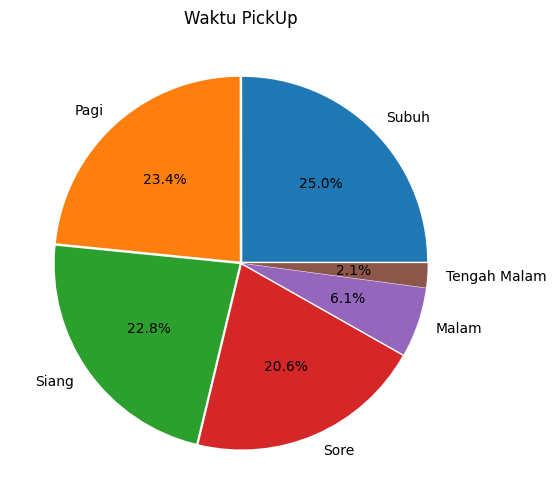

In [14]:
plt.figure(figsize=(6,6))

plt.pie(
    x= df.Ket_Waktu.value_counts(),  # isi dengan kolom numerical
    labels= ('Subuh','Pagi','Siang','Sore','Malam','Tengah Malam'),      # isi dengan kolom categorical
    autopct='%1.1f%%',                    # label percentage
    explode= (0.01, 0.01, 0.01, 0.01, 0.01, 0.01)
)
plt.title('Waktu PickUp')
plt.show()

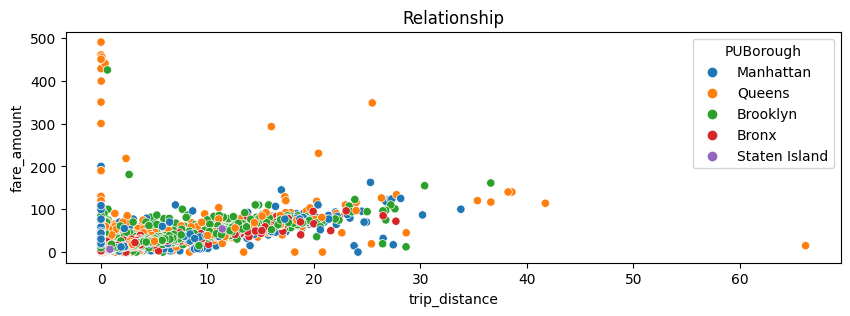

In [16]:
plt.figure(figsize=(10,3))

sns.scatterplot(data=df, x='trip_distance', y='fare_amount', hue = 'PUBorough')

plt.title('Relationship')

plt.show()